# Titanic Challange

This is my first attempt at a kaggle competition. I used the [Titanic dataset](https://www.kaggle.com/c/titanic), which proposes an analysis regarding the study of which population would be more likely to survive the Titanic incident. 

In this solution, I went through the following steps:
- Reading and analysing the data
- Exploring and creating useful functions to visualize the data
- Feature Engineering
- Data preparation
- Model biulding and analysis of performance
- Fine tuning

## Reading and analysing the data

Importing basic libraries:

In [44]:
import sys
sys.path.append('./lib/python2.7/site-packages')

import numpy as np

import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

import seaborn as sns

Reading the data:

In [86]:
test_path = 'datasets/test.csv'
train_path = 'datasets/train.csv'

test_set = pd.read_csv(test_path)
train_set = pd.read_csv(train_path)

Displaying some basic information about the test set:

In [46]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Displaying some information about the train set too:

In [48]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the `info()` method, it can be seen that the "Cabin" attribute has only 204 non-null values of all the 891 entries in the train set. This can be better visualized by using `seaborn` heatmaps:

In [51]:
def data_investigation(data):
    print('Number of instances : ' + str(data.shape[0]))
    print('Number of variables : ' + str(data.shape[1]))
    print('-'*20)
    print('Attributes, data type and ratio of unique instances por total non-null:')
    for i in range(data.shape[1]):
        print('\t - ' + str(data.columns[i]) + ', ' + str(data.dtypes[i]) 
              + ', ' + str(len(data[data.columns[i]].value_counts())) + '/' + 
             str(sum(data[data.columns[i]].value_counts())))
    
    print('-'*20)
    print('Attributes that have missing values: ')
    sum_missing_val = data.isnull().sum()
    print(sum_missing_val[sum_missing_val>0])
    print('-'*20)
    print('Pictorial representation of missing values:')
    plt.figure(figsize=(10,8))
    sns.heatmap(data.isnull(), yticklabels = False, cmap = 'gray')
    plt.show()

Number of instances : 891
Number of variables : 12
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - PassengerId, int64, 891/891
	 - Survived, int64, 2/891
	 - Pclass, int64, 3/891
	 - Name, object, 891/891
	 - Sex, object, 2/891
	 - Age, float64, 88/714
	 - SibSp, int64, 7/891
	 - Parch, int64, 7/891
	 - Ticket, object, 681/891
	 - Fare, float64, 248/891
	 - Cabin, object, 147/204
	 - Embarked, object, 3/889
--------------------
Attributes that have missing values: 
Age         177
Cabin       687
Embarked      2
dtype: int64
--------------------
Pictorial representation of missing values:


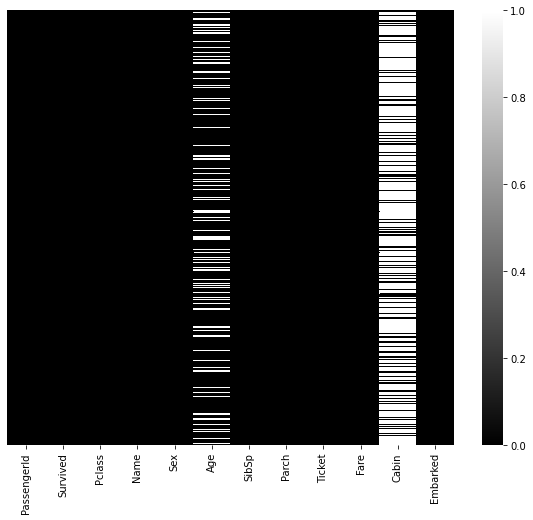

In [52]:
data_investigation(train_set)

Number of instances : 418
Number of variables : 11
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - PassengerId, int64, 418/418
	 - Pclass, int64, 3/418
	 - Name, object, 418/418
	 - Sex, object, 2/418
	 - Age, float64, 79/332
	 - SibSp, int64, 7/418
	 - Parch, int64, 8/418
	 - Ticket, object, 363/418
	 - Fare, float64, 169/417
	 - Cabin, object, 76/91
	 - Embarked, object, 3/418
--------------------
Attributes that have missing values: 
Age       86
Fare       1
Cabin    327
dtype: int64
--------------------
Pictorial representation of missing values:


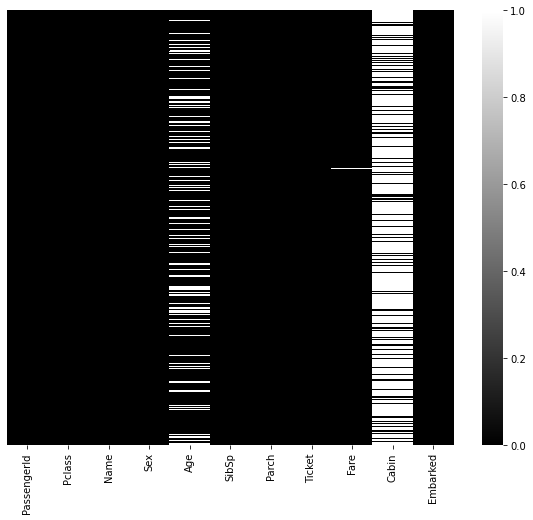

In [53]:
data_investigation(test_set)

From the descriptive function created above, it can be seen that "Cabin" has 147/204 unique values for the training set and 76/91 for the test set. Furthermore, it's object type make it impossible to calculate means or medians or to regress. It is best the to just drop this attribute. But before doing so, I'll keep the original data stored on the variables "train_set_init" and "test_set_init" so to test full transformations later on.

In [87]:
train_set_init = train_set
test_set_init = test_set

In [88]:
def drop_feat(df, attr):
    for ft in attr:
        if ft in df.columns:
            return df.drop(attr, axis = 1)
        else:
            print('No such feature as ' + ft)

train_set = drop_feat(train_set, ['Cabin'])
test_set = drop_feat(test_set, ['Cabin'])

## Exploring and visualizing the data 

Aside from the aforementioned analysis, the data can be further investigated in respect to correlations. The goal is to check how much correlation there is between each feature and the target feature (survive). To do so, one can use, for the non-categorical features, correlation metrics such as [Pearson's $r$ coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). 

In [89]:
corr_matrix = train_set.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


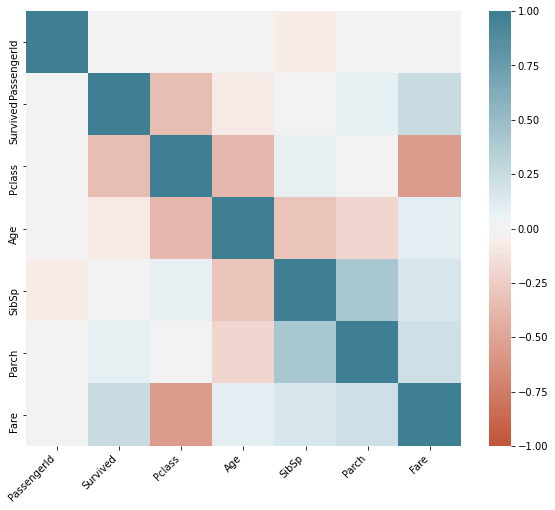

In [90]:
def corr_matrix_plot(corr_matrix):
    plt.figure(figsize=(10,8))
    
    ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
        horizontalalignment='right');
    
corr_matrix_plot(corr_matrix)

It can be seen that, from the given data, the features that correlate the most with the "Survived" attribute are "Fare" (positively correlated) and "Pclass" (negatively correlated). Later it will be checked if there are any possible feature engineering such as to increase correlation between other features.

The built-in correlation method from pandas only regard numerical features. As for the categorical features, they are better understood if visualized. It can be plot histograms in order to visualize how they are distributed among their possible classes, and how they are separated between __survived__ and __not survived__ instances. 

In [58]:
def hist_stack_plot(df, targets):
    L = len(targets)
    arrang = np.arange(2)
    labels_stack = ['Survived', 'Not survived']
    
    plt.figure(figsize = (12, 12))
    for i in range(len(targets)):
        plt.subplot(2, L, i+1)
        sns.countplot(x = targets[i], data = df)
        plt.ylabel(targets[i])
        plt.xlabel('')
        plt.xticks(rotation=60)
        
    for i in range(len(targets)):
        plt.subplot(2, L, L+i+1)
        sur = df[df['Survived'] == 1][targets[i]].value_counts()
#        sur = sur.values.reshape((len(sur), 1))
        sur_n = np.array(sur)
        not_sur = df[df['Survived'] == 0][targets[i]].value_counts()
#        not_sur = not_sur.values.reshape((len(not_sur), 1))
        not_sur_n = np.array(not_sur)
        
        if (len(sur) <= len(not_sur)):
            lim = len(sur)
        else:
            lim = len(not_sur)
        
        for j in range(lim):
            a = sur_n[j]
            b = not_sur_n[j]
            
            c = (a, b)
            plt.bar(arrang, c, label = sur.index[j])
            
        plt.xticks(arrang, labels_stack)
        plt.ylabel(targets[i])
        plt.legend(loc = 'upper left')
    
    plt.tight_layout()
        
    plt.show()
    
def hist_plot(df, target):
    J, L = get_subplot_dims(target)
    
    plt.figure(figsize = (12, 12))
    for i in range(len(target)):
        plt.subplot(J, L, i+1)
        sns.countplot(x = target[i], data = df)
        plt.xticks(rotation=60)
        
    plt.tight_layout()
    
    plt.show()
    
def get_subplot_dims(targets):
    a = (int(len(targets)/3))*3
    
    if a == len(targets):
        j = int(a/3)
    elif a < len(targets):
        j = int(a/3) + 1
    return(j, 3)    


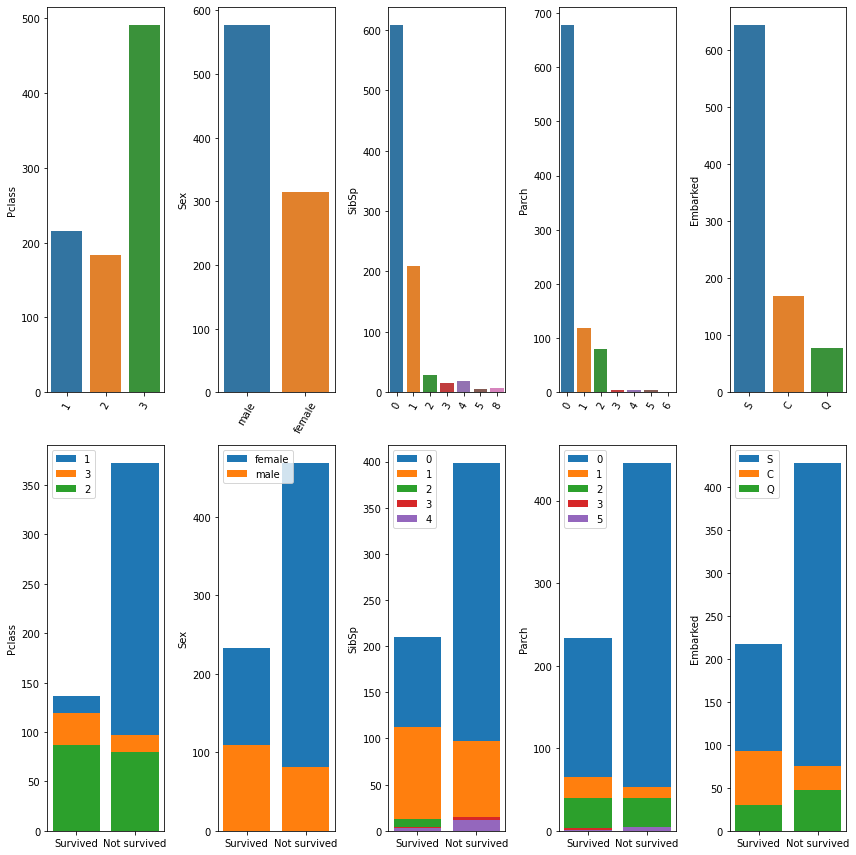

In [59]:
attr = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
hist_stack_plot(train_set, attr)

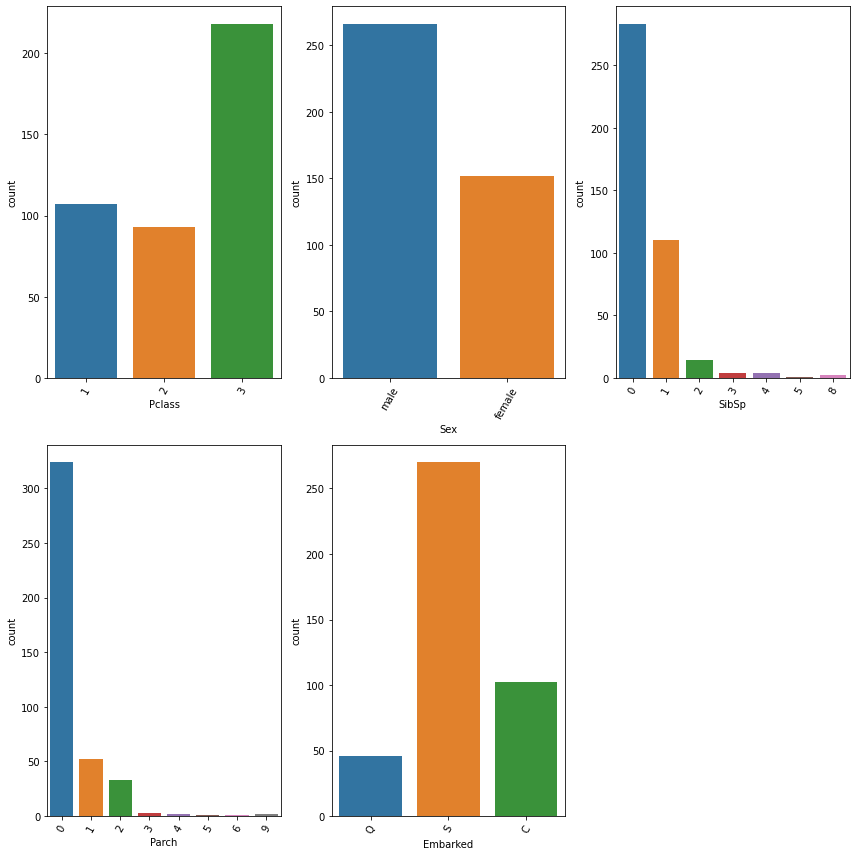

In [60]:
hist_plot(test_set, attr)

Some results are interesting to note from the histogram plots:

- Except for the "Embarked" attribute, the training and the test set is fairly stratified [(notes on stratified samplig)](https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi)
- The correlation between "Pclass" and survival can be easily visualized. A higher probability of dying is attributed to the instances that hold the value 1. As the class value increases, the probability of survival scatters a bit, meaning that little correlation happers when "Pclass" is 3
- The "Sex" attribute has a high correlation with survival. Thus, it is mandatory to include it on the training process
- The "SibSp" and "Parch" (number of siblings/spouses and parents/children aboard the Titanic, respectively) more or less follow the Survived/Not survived trend: as the amount of instances shrinks, so do each attribute. As a result, there is low correlation between survival and such attributes

The same plots can be done for the numerical data if the nomerical instances are attributed instead to an interval:

In [61]:
def cut_df(df, targets, bins):
    df_cut = pd.DataFrame(index = df.index, columns = targets)
    df_cut['Survived'] = df['Survived']
    for i in range(len(targets)):
        df_cut[targets[i]] = pd.cut(df[targets[i]], bins[i])
    
    return df_cut

attr = ['Age', 'Fare', 'PassengerId']
bins = [5, 5, 5]

train_set_cut = cut_df(train_set, attr, bins)

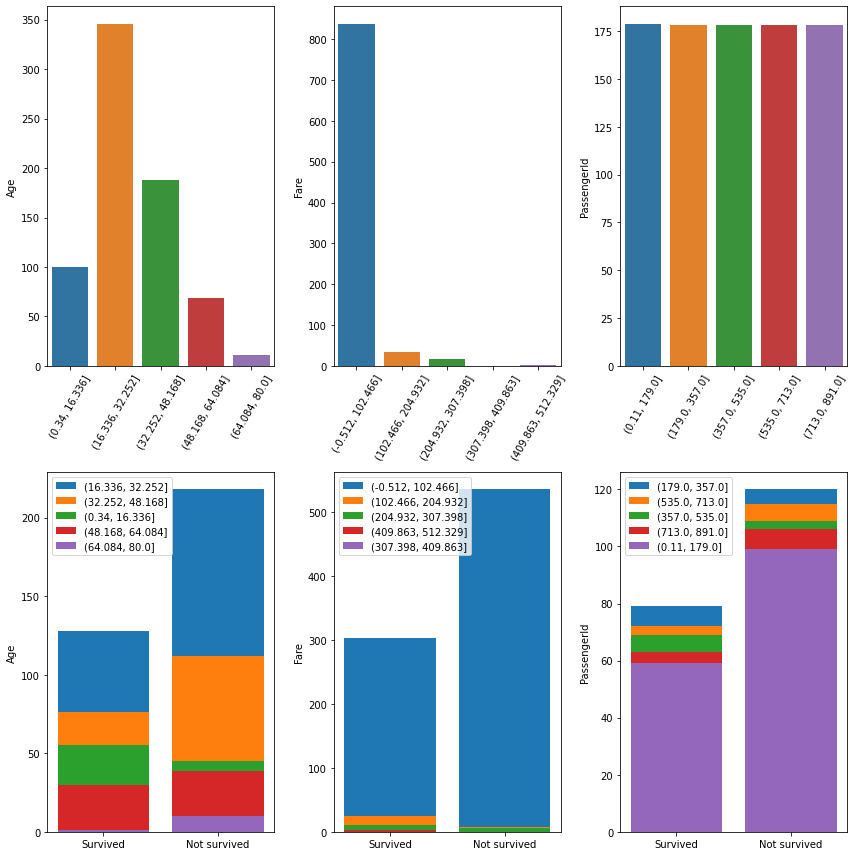

In [62]:
hist_stack_plot(train_set_cut, attr)

Again, no strong correlations could be seen for the "Age" and "Fare" attributes, except that there is a higher probability of a person with age between 32 and 48 dying and surviving if the age is between 0 and 16. For the "PassengerId", obviously there is no correlation.

## Feature Engineering

The goal of feature engineering is to look for transformations over given features in order to stablish new features with greater value to the model, i.e., increasing it's predictive capacity. For this case, one could imagine that the "SibSp" and "Parch" features could be combined into one "Family" attribute, that there could be useful information for the "Name" feature,  or that other feature transformations could be tested to check for possible correlations.

### Using name's title to input missing values on Age

As it was seen before, "Age" feature has 177 missing values on the training set and 86 for the test set. One could use the `SimpleImputer` class in order to input missing values, using a strategy such as `median`. Instead, it could be checked first if there is any correlation between a person's title and it's age and, if there is, fill the missing values with respect the title using a certain strategy. 

To extract the titles:

In [91]:
def extract_titles(dataset):
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [93]:
extract_titles(train_set)
extract_titles(test_set)
train_set['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Capt          1
Jonkheer      1
Don           1
Lady          1
Countess      1
Mme           1
Ms            1
Name: Title, dtype: int64

In [94]:
train_set.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Countess,1.0,33.000000,NaN,33.00,33.000,33.0,33.00,33.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0


From the descriptive table given before, it was seen that the std for "Age" was around 14.5, with a mean value of 29.69. The table above points that the highest std is of 13.13, where, for each title, the mean age varies considerably. So, using the titles to inpute the missing age values is not a bad choice. To do so:

In [95]:
def insert_age_title_based(df):
    df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'), inplace = True)

In [98]:
insert_age_title_based(train_set)
insert_age_title_based(test_set)

train_set['Age'].isnull().sum(), test_set['Age'].isnull().sum()

(0, 1)

One last thing that could be checked before moving foward is how much a title could be related to the survival of a person. This can be qualitatively visualized bu using the "hist_stack_plot" defined earlier:  

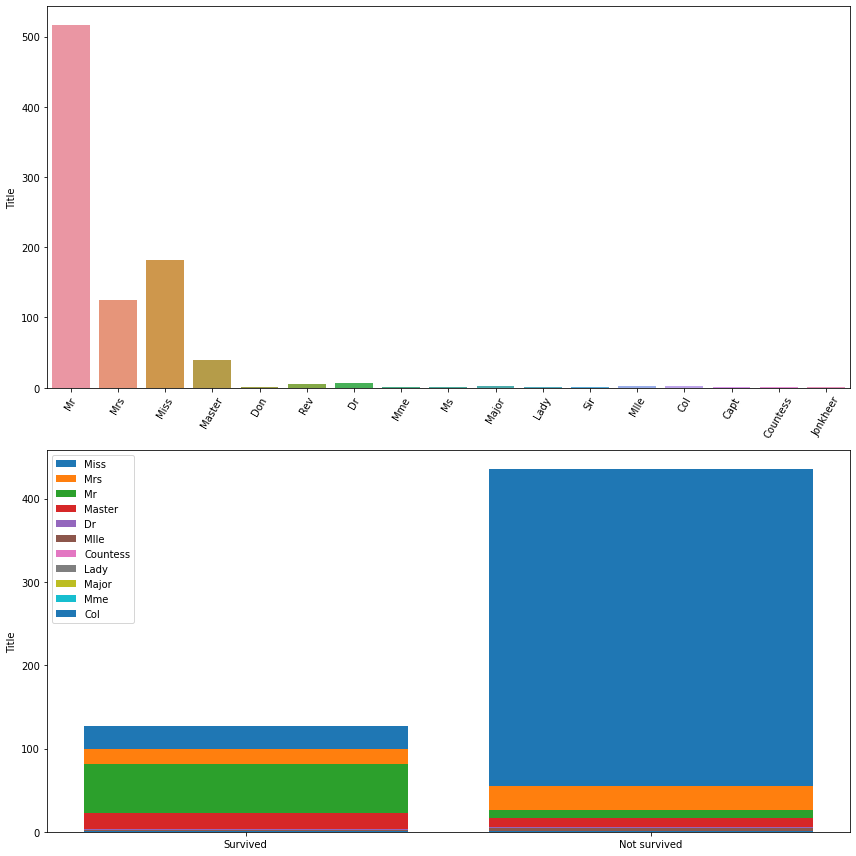

In [66]:
hist_stack_plot(train_set, ['Title'])

From the figure, a great amount of people entitled "Miss" (hence women) didn't survive, while those with the title "Mr." (hence men) had higher probability of surviving. This was seen earlier when analysing the correlation between sex and survival. Anyway, it is clear that this feature, although it may indicate high correlation with survival, has too many categories, and which too many of them is non-equally distributes, what can worse the prediction performance. Therefore, it would be more interesting to maintain classes that are more present and to group the rest into one "Others" category. To do so:

In [100]:
def simplify_titles(df):
    df['Title'] = df['Title'].replace([
        'Lady', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'
        ], 'Others')

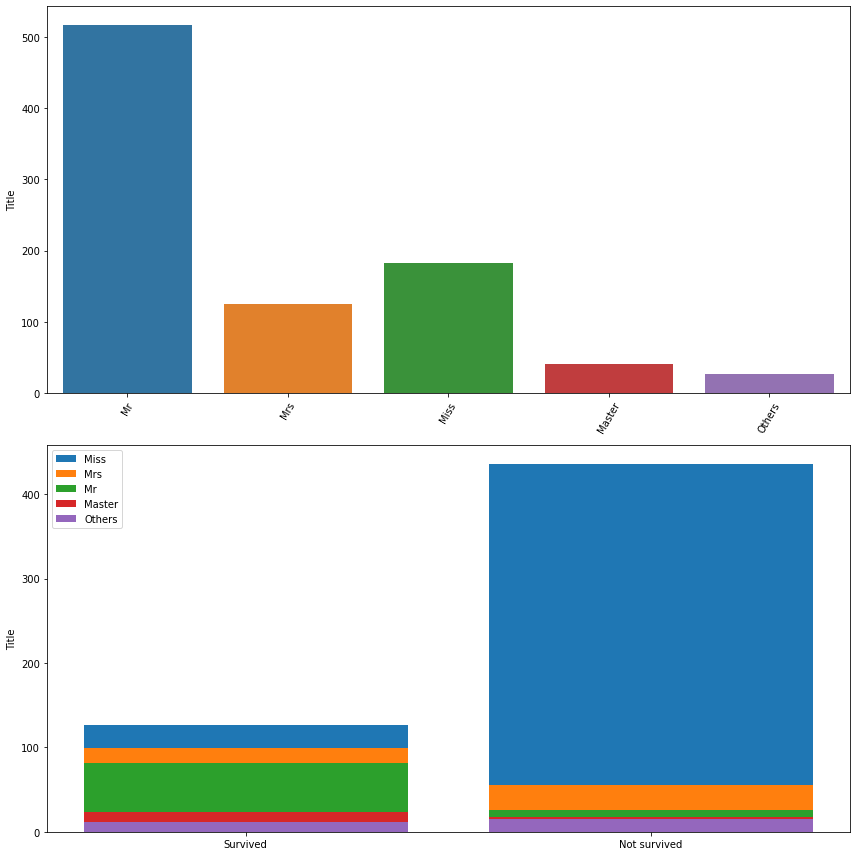

In [103]:
simplify_titles(train_set)
simplify_titles(test_set)

hist_stack_plot(train_set, ['Title'])

### Testing possible features

One could use the possible transformations cited before in order to check for possible correlations.

In [68]:
possib_attr = ['Survived', 'Family Size', 'Class*Age', 'Class*Fare']

possib_feat = pd.DataFrame(index = train_set.index, columns = possib_attr)

possib_feat['Survived'] = train_set['Survived']

possib_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Survived     891 non-null    int64 
 1   Family Size  0 non-null      object
 2   Class*Age    0 non-null      object
 3   Class*Fare   0 non-null      object
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [69]:
possib_feat['Family Size'] = train_set['SibSp'] + train_set['Parch'] + 1

possib_feat['Class*Age'] = train_set['Pclass'] * train_set['Age']

possib_feat['Class*Fare'] = train_set['Pclass'] * train_set['Fare']

possib_corr_matrix = possib_feat.corr()
possib_corr_matrix

,Survived,Family Size,Class*Age,Class*Fare
Survived,1.000000,0.016639,-0.346344,0.183627
Family Size,0.016639,1.000000,-0.233861,0.486379
Class*Age,-0.346344,-0.233861,1.000000,-0.292509
Class*Fare,0.183627,0.486379,-0.292509,1.000000


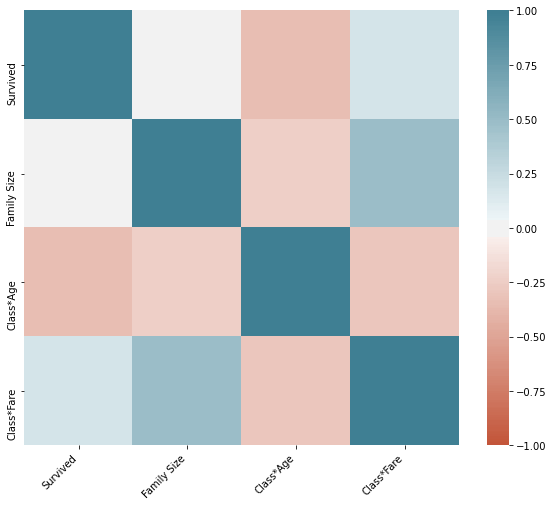

In [70]:
corr_matrix_plot(possib_corr_matrix)

From the correlation matrix, it can be seen that "Class\*Age" and "Class\*Fare" have a considerable correlation with survival. As for the "Family Size", it shows a lower correlation when compared to any of its constituents attributes ("SibSp" and "Parch"), so it can be dropped.

The "Class\*Age" and "Class\*Fare" will be later passed to the dataset through a Custom Transformer pipeline.

## Data preparation

So far, the training set looks like this:

In [104]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


Number of instances : 891
Number of variables : 12
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - PassengerId, int64, 891/891
	 - Survived, int64, 2/891
	 - Pclass, int64, 3/891
	 - Name, object, 891/891
	 - Sex, object, 2/891
	 - Age, float64, 92/891
	 - SibSp, int64, 7/891
	 - Parch, int64, 7/891
	 - Ticket, object, 681/891
	 - Fare, float64, 248/891
	 - Embarked, object, 3/889
	 - Title, object, 5/891
--------------------
Attributes that have missing values: 
Embarked    2
dtype: int64
--------------------
Pictorial representation of missing values:


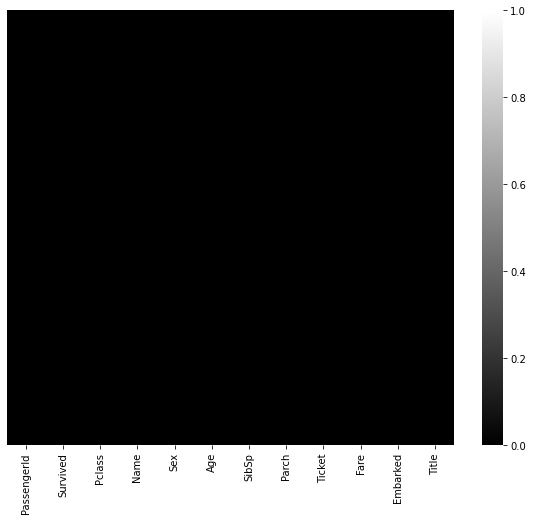

In [105]:
data_investigation(train_set)

Number of instances : 418
Number of variables : 11
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - PassengerId, int64, 418/418
	 - Pclass, int64, 3/418
	 - Name, object, 418/418
	 - Sex, object, 2/418
	 - Age, float64, 82/417
	 - SibSp, int64, 7/418
	 - Parch, int64, 8/418
	 - Ticket, object, 363/418
	 - Fare, float64, 169/417
	 - Embarked, object, 3/418
	 - Title, object, 6/418
--------------------
Attributes that have missing values: 
Age     1
Fare    1
dtype: int64
--------------------
Pictorial representation of missing values:


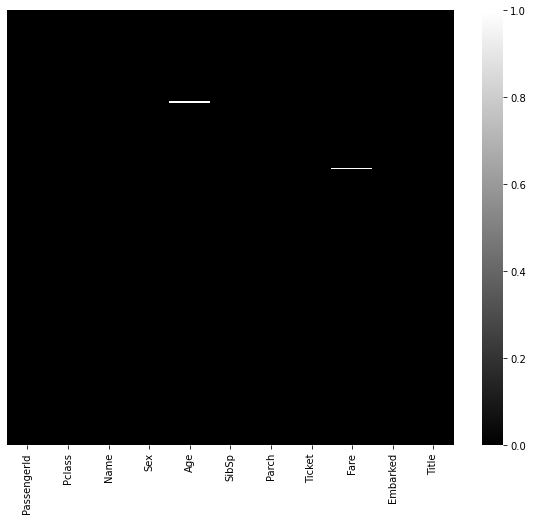

In [106]:
data_investigation(test_set)

Now it is time to prepare the data to train the predictive models. To do so, the data must be scaled, the categorical data must be encoded, all of the remaining missing values must be taken care of and not usefull attributes must be dropped. 

In [107]:
attr_to_drop = ['PassengerId', 'Name', 'Ticket']

train_set = drop_feat(train_set, attr_to_drop)
test_set = drop_feat(test_set, attr_to_drop)

In [108]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### Pipelining transformations

The encoding and scaliing can be applyied by passing the datasets into a __sklearn pipeline__. To do, one must separate the numerical features from the categorical ones, since the full pipeline must be constructed over the numerical. To do so: 

In [109]:
attr_num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
attr_cat = ['Sex', 'Embarked', 'Title']
attr_label = ['Survived']

train_num = train_set[attr_num]
train_cat = train_set[attr_cat]
train_label = train_set[attr_label]

train_s = drop_feat(train_set, attr_label)

test_num = test_set[attr_num]
test_cat = test_set[attr_cat]

In [110]:
train_s

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,female,38.000000,1,0,71.2833,C,Mrs
2,3,female,26.000000,0,0,7.9250,S,Miss
3,1,female,35.000000,1,0,53.1000,S,Mrs
4,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Others
887,1,female,19.000000,0,0,30.0000,S,Miss
888,3,female,21.773973,1,2,23.4500,S,Miss
889,1,male,26.000000,0,0,30.0000,C,Mr


The pipeline will be consisted of:

- A custom imputer, to make sure that no data is being passed empty (in this case it was explicitly written so to pass a pandas dataframe to the "CommbinedAttr" class. Also, apparently pandas' Pipeline method can't accept input to go through a first layer of transformation with NaN's, so the custom imputer was called before the pipeline, from the function "transform_full")
- A Standard Scaler
- A custom transformer, based on the proposed transformation over "Pclass" and "Age"
- An encoder (`OneHotEncoder`)

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttr(BaseEstimator, TransformerMixin):
    def __init__(self, add_family_size = False):
        self.add_family_size = add_family_size
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        #class_id = X.columns.get_loc('Pclass')
        #age_id = X.columns.get_loc('Age')
        #fare_id = X.columns.get_loc('Fare')
        class_age = X['Pclass'] * X['Age']
        class_age.columns = ['Class*Age']
        class_fare = X['Pclass'] * X['Fare']
        class_fare.columns = ['Class*Fare']
        if self.add_family_size:
            family_size = X['SibSp'] + X['Parch'] + 1 
            family.size.columns = ['Family Size']
            X['Class*Age'] = class_age
            X['Class*Fare'] = class_fare
            X['Family Size'] = family_size
            return X
        else:
            X['Class*Age'] = class_age
            X['Class*Fare'] = class_fare            
            return X
        
class CustImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        a = X.isnull().sum()
        b = a[a>0]
        c = b.index
        
        for i in c:
            type_var = X[i].dtype
            if (type_var == 'int64') or (type_var == 'float64'):
                X[i] = X[i].fillna(X[i].mean())
            elif (type_var == 'O'):
                X = X.dropna(subset = [i], axis = 0)
            
        return X
    
def transform_full(inp):
    attr_impute = CustImputer()
    imputer_out = attr_impute.transform(inp)
    
    out = full_pipe.fit_transform(imputer_out)
    return out

num_pipe = Pipeline([
    ('custom_transform', CombinedAttr()),
    ('std_scaler', StandardScaler()),
])

full_pipe = ColumnTransformer([
    ('num', num_pipe, attr_num),
    ('cat', OneHotEncoder(), attr_cat),
])

In [112]:
test_prep = transform_full(test_set)
train_prep = transform_full(train_s)

     Pclass        Age  SibSp  Parch      Fare
0         3  34.500000      0      0    7.8292
1         3  47.000000      1      0    7.0000
2         2  62.000000      0      0    9.6875
3         3  27.000000      0      0    8.6625
4         3  22.000000      1      1   12.2875
..      ...        ...    ...    ...       ...
413       3  32.000000      0      0    8.0500
414       1  39.000000      0      0  108.9000
415       3  38.500000      0      0    7.2500
416       3  32.000000      0      0    8.0500
417       3   7.406471      1      1   22.3583

[418 rows x 5 columns]
     Pclass        Age  SibSp  Parch     Fare
0         3  22.000000      1      0   7.2500
1         1  38.000000      1      0  71.2833
2         3  26.000000      0      0   7.9250
3         1  35.000000      1      0  53.1000
4         3  35.000000      0      0   8.0500
..      ...        ...    ...    ...      ...
886       2  27.000000      0      0  13.0000
887       1  19.000000      0      0  30.000

In [113]:
train_prep.shape

(889, 17)

In [81]:
train_prep

array([[ 0.82520863, -0.5823655 ,  0.43135024, ...,  1.        ,
         0.        ,  0.        ],
       [-1.57221121,  0.62631423,  0.43135024, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82520863, -0.28019556, -0.47519908, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82520863, -0.59944017,  0.43135024, ...,  0.        ,
         0.        ,  0.        ],
       [-1.57221121, -0.28019556, -0.47519908, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82520863,  0.17305933, -0.47519908, ...,  1.        ,
         0.        ,  0.        ]])

The output from the pipeline is a Numpy array, with float objects. To ease the analysis, it can be passed to a pandas dataframe by specifying what the columns are. To do so, one must note that in scaling and imputing methods, the order of the features are maintained, while on an encoding process the categorical features are transformed in order respecting the input dataframe (in this case, the order would be: Sex -> Embarked -> Title), and the categories are adjusted to follow a alphabetical order (so for Sex, the first column would be female -> male). A final note is that the categorical features are all transposed to the end of the array (columnwise).

Therefore, the features are arrenged in the following order: Pclass, Age, SibSp, Parch, Fare, Class\*Age, Class\*Fare, Sex (Female, Male), Embarked (C, Q, S) and finally Title (Master, Miss, Mr, Mrs, Others).

In [82]:
cols_name = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Class*Age', 'Class*Fare', 
             'Female', 'Male', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Others']

train_prep = pd.DataFrame(train_prep)
train_prep.columns = cols_name

In [83]:
train_prep.head()

,Pclass,Age,SibSp,Parch,Fare,Class*Age,Class*Fare,Female,Male,C,Q,S,Master,Miss,Mr,Mrs,Others
0,0.825209,-0.582365,0.431350,-0.474326,-0.500240,0.032301,-0.576273,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.572211,0.626314,0.431350,-0.474326,0.788947,-0.802649,0.383878,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.825209,-0.280196,-0.475199,-0.474326,-0.486650,0.390136,-0.537020,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.572211,0.399687,0.431350,-0.474326,0.422861,-0.892108,0.031414,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.825209,0.399687,-0.475199,-0.474326,-0.484133,1.195266,-0.529751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


With this, the data is finally prepared to be fed into a ML model. The label extraction for each feature could be done direclty by using a function to do so, like the one defined below.

In [122]:
def extract_feat_name(df):
    
    att = CombinedAttr()
    df = att.transform(df)
    
    a = df.dtypes
    num = pd.DataFrame()
    obj = pd.DataFrame()
    obj_encoded = pd.DataFrame()
    
    for i in range(len(a)):
        if (a[i] == 'int64') or (a[i] == 'float64'):
            num[a.index[i]] = a.index[i]
        elif (a[i] == 'O'):
            obj[a.index[i]] = a.index[i]
    
    for i in obj.columns:
        b = df[i].value_counts()
        for j in sorted(b.index):
            obj_encoded[j] = j
    
    return list(num.columns) + list(obj_encoded.columns)

One final note: in a real ML project, the data must be passed direclty into a pipeline, or a group of functions, in order to automatically transform the whole data in some intended manner and then be fed into the model. This can be done in this example by using the initial variables "train_set_init" and "test_set_init" stored before and defining a general transformation function. This general function, for this specific case:

- Drops the "Cabin" feature
- Extracts the titles from the "Name" feature (`extract_titles` function)
- Impute the missing "Age" values by using the "Title" feature (`insert_age_title_based` function)
- Simplifies the categories inside the "Title" feature (`simplify_titles` function) 
- Drops the "PassengerId", "Name" and "Ticket" features
- Spliting the train label (target) from the train set
- Extracts the array with features, considering the processes to be taken on the pipeline transformation (`extract_feat_name` function)
- Passes the dataframes into the pipeline (`transform_full` function)
- Turns the output from the pipeline transformation into a pandas DataFrame

In [130]:
def general_transformation(df, train = True):
    df = drop_feat(df, ['Cabin'])
    
    extract_titles(df)
    insert_age_title_based(df)
    simplify_titles(df)
    
    df = drop_feat(df, ['PassengerId', 'Name', 'Ticket'])
    
    if train == True :
        train_df = drop_feat(df, ['Survived'])
        train_label = df['Survived']
        
        cols_name = extract_feat_name(train_df)
        
        transformed = transform_full(train_df)

        transformed = pd.DataFrame(transformed)
        transformed.columns = cols_name

        return transformed, train_label
    else: 
        cols_name = extract_feat_name(df)
        
        transformed = transform_full(df)

        transformed = pd.DataFrame(transformed)
        transformed.columns = cols_name

        return transformed

In [137]:
train_set_prep, train_label_prepared = general_transformation(train_set_init)
test_set_prep = general_transformation(test_set_init, train = False)

In [138]:
train_set_prep.head()

,Pclass,Age,SibSp,Parch,Fare,Class*Age,Class*Fare,female,male,C,Q,S,Master,Miss,Mr,Mrs,Others
0,0.825209,-0.582365,0.431350,-0.474326,-0.500240,0.032301,-0.576273,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.572211,0.626314,0.431350,-0.474326,0.788947,-0.802649,0.383878,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.825209,-0.280196,-0.475199,-0.474326,-0.486650,0.390136,-0.537020,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.572211,0.399687,0.431350,-0.474326,0.422861,-0.892108,0.031414,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.825209,0.399687,-0.475199,-0.474326,-0.484133,1.195266,-0.529751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Number of instances : 889
Number of variables : 17
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - Pclass, float64, 3/889
	 - Age, float64, 92/889
	 - SibSp, float64, 7/889
	 - Parch, float64, 7/889
	 - Fare, float64, 247/889
	 - Class*Age, float64, 137/889
	 - Class*Fare, float64, 246/889
	 - female, float64, 2/889
	 - male, float64, 2/889
	 - C, float64, 2/889
	 - Q, float64, 2/889
	 - S, float64, 2/889
	 - Master, float64, 2/889
	 - Miss, float64, 2/889
	 - Mr, float64, 2/889
	 - Mrs, float64, 2/889
	 - Others, float64, 2/889
--------------------
Attributes that have missing values: 
Series([], dtype: int64)
--------------------
Pictorial representation of missing values:


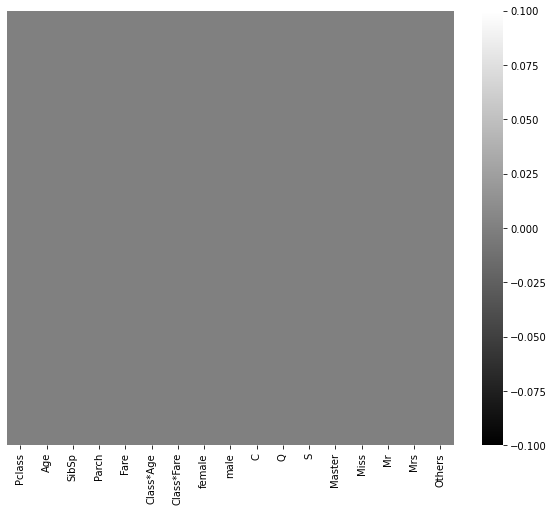

In [140]:
data_investigation(train_set_prep)

In [141]:
test_set_prep.head()

,Pclass,Age,SibSp,Parch,Fare,Class*Age,Class*Fare,female,male,C,Q,S,Dona,Master,Miss,Mr,Mrs,Others
0,0.873482,0.330060,-0.499470,-0.400248,-0.498407,1.342412,-0.541383,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.873482,1.292006,0.616992,-0.400248,-0.513274,2.602334,-0.585997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.315819,2.446342,-0.499470,-0.400248,-0.465088,2.031169,-0.615141,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.873482,-0.247108,-0.499470,-0.400248,-0.483466,0.586459,-0.496548,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.873482,-0.631887,0.616992,0.619896,-0.418471,0.082491,-0.301508,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Number of instances : 418
Number of variables : 18
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - Pclass, float64, 3/418
	 - Age, float64, 83/418
	 - SibSp, float64, 7/418
	 - Parch, float64, 8/418
	 - Fare, float64, 170/418
	 - Class*Age, float64, 115/418
	 - Class*Fare, float64, 167/418
	 - female, float64, 2/418
	 - male, float64, 2/418
	 - C, float64, 2/418
	 - Q, float64, 2/418
	 - S, float64, 2/418
	 - Dona, float64, 2/418
	 - Master, float64, 2/418
	 - Miss, float64, 2/418
	 - Mr, float64, 2/418
	 - Mrs, float64, 2/418
	 - Others, float64, 2/418
--------------------
Attributes that have missing values: 
Series([], dtype: int64)
--------------------
Pictorial representation of missing values:


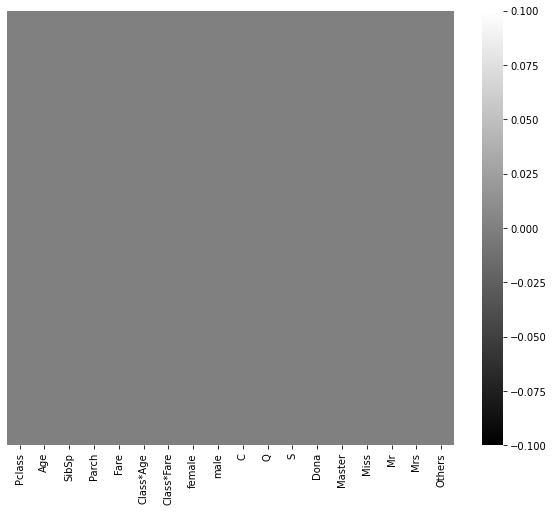

In [143]:
data_investigation(test_set_prep)

## Model analysis